In [22]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

def load_images_from_folder(folder_path):
    image_list = []
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']

    for filename in os.listdir(folder_path):
        if any(filename.lower().endswith(ext) for ext in valid_extensions):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path).convert('RGB')  # Convert to RGB
            image = image.resize((128, 128))  # Resize images if needed
            image_array = np.array(image) / 255.0  # Normalize pixel values
            image_list.append(image_array)

    return np.array(image_list)

# Load images from the folder
folder_path = r"C:\Users\parij\OneDrive - iitkgp.ac.in\Documents\NCC CATC 2023"
images = load_images_from_folder(folder_path)

# Split the data into training and testing sets
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

# Define the autoencoder model
input_shape = (128, 128, 3)
latent_dim = 32  # Adjust the latent dimension as needed

# Encoder
encoder_inputs = keras.Input(shape=input_shape)
x = layers.Flatten()(encoder_inputs)
x = layers.Dense(64, activation="relu")(x)
encoder_outputs = layers.Dense(latent_dim, activation="relu")(x)
encoder = keras.Model(encoder_inputs, encoder_outputs, name="encoder")

# Decoder
decoder_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64, activation="relu")(decoder_inputs)
x = layers.Dense(np.prod(input_shape), activation="sigmoid")(x)
decoder_outputs = layers.Reshape(input_shape)(x)
decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")

# Autoencoder
autoencoder_inputs = keras.Input(shape=input_shape)
encoded = encoder(autoencoder_inputs)
decoded = decoder(encoded)
autoencoder = keras.Model(autoencoder_inputs, decoded, name="autoencoder")

# Compile the model
autoencoder.compile(optimizer="adam", loss="mse")

# Train the autoencoder
autoencoder.fit(train_images, train_images, epochs=20, batch_size=32, shuffle=True, validation_data=(test_images, test_images))

# Make predictions on the test set
decoded_images = autoencoder.predict(test_images)

# Calculate reconstruction errors
mse = np.mean(np.square(test_images - decoded_images), axis=(1, 2, 3))

# Set a threshold for anomaly detection (e.g., mean + 2 * standard deviation)
threshold = np.mean(mse) + 0.5 * np.std(mse)

# Identify anomalies
anomalies = test_images[mse > threshold]

Epoch 1/20
11/11 [==============================] - 2s 139ms/step - loss: 0.0601 - val_loss: 0.0539
Epoch 2/20
11/11 [==============================] - 1s 120ms/step - loss: 0.0577 - val_loss: 0.0540
Epoch 3/20
11/11 [==============================] - 1s 121ms/step - loss: 0.0563 - val_loss: 0.0529
Epoch 4/20
11/11 [==============================] - 1s 94ms/step - loss: 0.0548 - val_loss: 0.0515
Epoch 5/20
11/11 [==============================] - 1s 117ms/step - loss: 0.0533 - val_loss: 0.0494
Epoch 6/20
11/11 [==============================] - 1s 120ms/step - loss: 0.0512 - val_loss: 0.0457
Epoch 7/20
11/11 [==============================] - 1s 124ms/step - loss: 0.0468 - val_loss: 0.0432
Epoch 8/20
11/11 [==============================] - 1s 121ms/step - loss: 0.0435 - val_loss: 0.0415
Epoch 9/20
11/11 [==============================] - 1s 124ms/step - loss: 0.0426 - val_loss: 0.0417
Epoch 10/20
11/11 [==============================] - 1s 112ms/step - loss: 0.0414 - val_loss: 0.0407


In [23]:
decoded_images = autoencoder.predict(images)
mse = np.mean(np.square(images - decoded_images), axis=(1, 2, 3))

# Set a threshold for anomaly detection (e.g., mean + 2 * standard deviation)
threshold = np.mean(mse) + 2 * np.std(mse)
anomalies = images[mse > threshold]

13/13 [==============================] - 0s 38ms/step


In [24]:
print(len(anomalies))

3


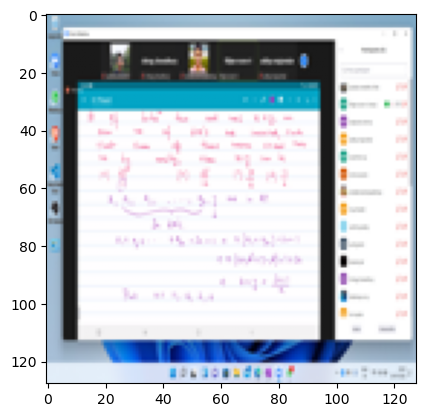

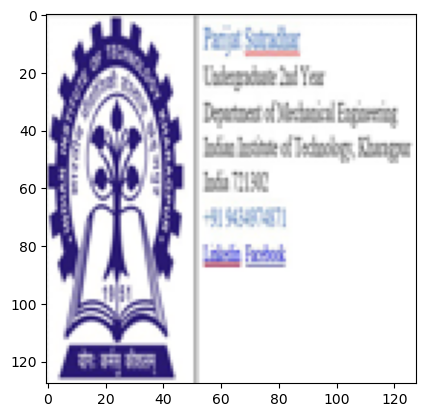

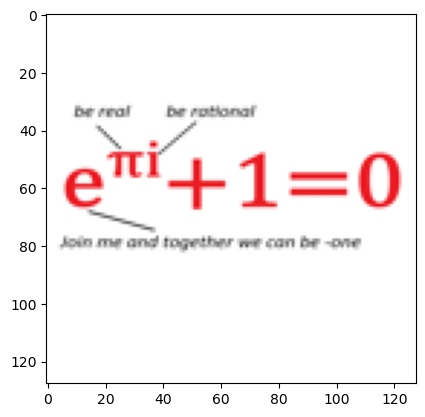

In [25]:
def display_image(image):
    plt.imshow(image)
    plt.axis('on')  # Turn off axis labels
    plt.show()

# Display anomalies
for anomaly in anomalies:
    display_image(anomaly)